**Question** : Select any EEG signals dataset from any open source with atleast 10k sample points.
Calculate its fractal dimension by box counting method

**What is Fractal Dimension?**

A fractal dimension is a measure that characterizes how completely a fractal appears to fill space as you zoom in on it. For time series data like EEG signals, fractal dimensions help quantify the complexity or self-similarity of the signal.

**What is the Box-Counting Method?**

The box-counting method is one of the most widely used methods to compute the fractal dimension of a time series. In this method, the signal is "covered" with boxes of varying sizes, and the number of non-empty boxes is counted at each size. The fractal dimension is then estimated by examining how the number of non-empty boxes scales as the box size changes.

Mathematically, the fractal dimension D is calculated using the formula:

𝐷 = lim (𝜖 → 0)  (log(𝑁(𝜖))) / (log(1/𝜖))

Where:
N(ϵ) is the number of boxes of size ϵ required to cover the object.

ϵ is the size of the box.

By plotting log(N(ϵ)) against log⁡(1/𝜖) and computing the slope of the line, we can estimate the fractal dimension.

In [3]:
pip install liac-arff pandas numpy matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=24c6151684bbb3afe07b7cad15b954dd351957f2e06c5377fb8213541f650f11
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


The data set consists of 14 EEG values and a value indicating the eye state.

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds.

The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

Here, I have used 'AF3' EEG signal to calculate the Fractal Dimension.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

# Load the ARFF file
file_path = '/content/EEG Eye State.arff'

# Load the ARFF file
data, meta = arff.loadarff(file_path)
eeg_data = pd.DataFrame(data)
eeg_data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,b'1'
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,b'1'
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,b'1'
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,b'1'


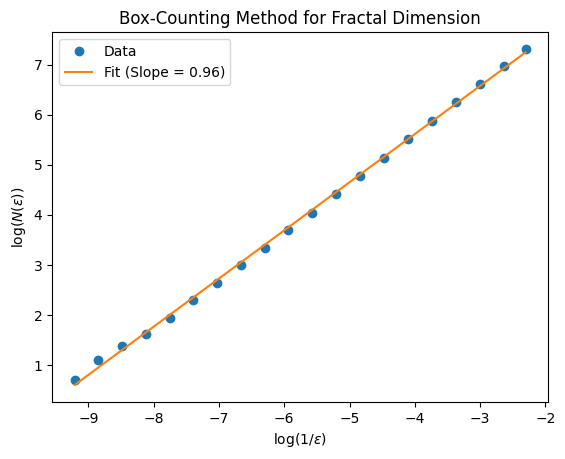

Fractal Dimension: 0.9615095216798412


In [13]:
# Extract the 'AF3' EEG signal column for fractal dimension calculation
eeg_signal = eeg_data['AF3'].values

# Box counting function
def box_counting(data, box_sizes):
    counts = []
    for size in box_sizes:
        # Break the time series into boxes of the current size
        num_boxes = int(np.ceil(len(data) / size))
        boxes = [data[i * size:(i + 1) * size] for i in range(num_boxes)]

        # Check if the box contains any part of the signal ( non-empty)
        non_empty_boxes = sum([np.max(box) != np.min(box) for box in boxes])
        counts.append(non_empty_boxes)

    return counts

# Fractal dimension calculation using the box-counting method
def fractal_dimension_box_counting(data):
    box_sizes = np.logspace(1, 4, num=20, dtype=int)  # Range of box sizes
    counts = box_counting(data, box_sizes)

    # Perform linear regression on log-log scale
    log_sizes = np.log(1 / box_sizes)
    log_counts = np.log(counts)
    coeffs = np.polyfit(log_sizes, log_counts, 1)  # Linear fit

    # The slope of the line gives the fractal dimension
    fractal_dimension = coeffs[0]

    # Plot the box-counting results
    plt.plot(log_sizes, log_counts, 'o', label="Data")
    plt.plot(log_sizes, np.polyval(coeffs, log_sizes), label=f"Fit (Slope = {fractal_dimension:.2f})")
    plt.xlabel(r"$\log(1/\epsilon)$")
    plt.ylabel(r"$\log(N(\epsilon))$")
    plt.title("Box-Counting Method for Fractal Dimension")
    plt.legend()
    plt.show()

    return fractal_dimension

# Calculate the fractal dimension for the 'AF3' EEG signal
fd = fractal_dimension_box_counting(eeg_signal)
print(f"Fractal Dimension: {fd}")

A fractal dimension of 0.96 suggests that the EEG signal does not have much complexity or irregularity. It’s somewhat smooth and predictable.

In EEG signals, a lower fractal dimension is often seen in simpler or more regular brain activities, such as when a person is at rest or in a calm, stable state.

Higher fractal dimensions (closer to 2 or higher) are generally associated with more chaotic and complex brain activities, such as during problem-solving tasks, cognitive load, or during certain neurological conditions like epilepsy.

Source of dataset: https://www.kaggle.com/code/mpwolke/eeg-eye-state-arff-file/notebook